In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Informasi Dasar Harga Produk

| Produk      | Harga Dasar Tahun 2021 (Rp) |
|-------------|----------------------------|
| Espresso    | 22.000                     |
| Latte       | 28.000                     |
| Cappuccino  | 25.000                     |
| Americano   | 21.000                     |
| Croissant   | 18.000                     |
| Donat       | 15.000                     |

- **Harga setiap produk naik 2% setiap tahun**  
  Contoh: Jika harga awal Espresso 22.000 di 2021, maka di 2023:  
  Tahun 2022 → 22.000 × 1.02 = 22.440  
  Tahun 2023 → 22.000 × 1.04 = 22.880 (pembulatan ke bawah karena integer di kode)

In [ ]:
def calculate_yearly_price(base_price, year):

  years_passed = year - 2021
  # Corrected calculation for simple 2% annual increase based on 2021 price
  yearly_price = base_price * (1 + 0.02 * years_passed)
  return yearly_price

In [ ]:
base_prices_2021 = {
    'Espresso': 22000,
    'Latte': 28000,
    'Cappuccino': 25000,
    'Americano': 21000,
    'Croissant': 18000,
    'Donat': 15000
}


prices_2022 = {product: round(calculate_yearly_price(price, 2022)) for product, price in base_prices_2021.items()}
prices_2023 = {product: round(calculate_yearly_price(price, 2023)) for product, price in base_prices_2021.items()}

print("Harga Tahun 2021:", base_prices_2021)
print("Harga Tahun 2022:", prices_2022)
print("Harga Tahun 2023:", prices_2023)

Harga Tahun 2021: {'Espresso': 22000, 'Latte': 28000, 'Cappuccino': 25000, 'Americano': 21000, 'Croissant': 18000, 'Donat': 15000}
Harga Tahun 2022: {'Espresso': 22440, 'Latte': 28560, 'Cappuccino': 25500, 'Americano': 21420, 'Croissant': 18360, 'Donat': 15300}
Harga Tahun 2023: {'Espresso': 22880, 'Latte': 29120, 'Cappuccino': 26000, 'Americano': 21840, 'Croissant': 18720, 'Donat': 15600}


---
## TUGAS 1: Eksplorasi Data

1. Baca dataset ke pandas DataFrame.
2. Tampilkan 10 baris pertama.
3. Hitung jumlah baris, kolom, baris duplikat, serta missing value per kolom.
4. Pastikan Kolom Unit_Terjual dan Harga_Per_Unit

### 1.1 Baca dataset ke pandas DataFrame.

In [ ]:
def read_data(path):
  data = pd.read_csv(path, sep=';')
  return data

In [ ]:
path = '/content/drive/MyDrive/1. Data Science and Data Analyst/6. Harisenin Bootcamp Data Analyst/Mission/4. Mission Intermediate 2 - Let Your Logic Guide the Data!/Dataset/penjualan_kopi_2021_2023 (1).csv'

In [ ]:
data = read_data(path)

### 1.2 Tampilkan 10 baris pertama

In [ ]:
data.head(10)

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
0,2021,Januari,1,Americano,52.0,21000.0
1,2021,Januari,1,Cappuccino,45.0,NaN
2,2021,Januari,1,Croissant,20.0,NaN
3,2021,Januari,1,Donat,20.0,15000.0
4,2021,Januari,1,Espresso,43.0,22000.0
5,2021,Januari,1,Latte,38.0,28000.0
6,2021,Januari,2,Americano,44.0,21000.0
7,2021,Januari,2,Cappuccino,36.0,NaN
8,2021,Januari,2,Croissant,18.0,18000.0
9,2021,Januari,2,Croissant,18.0,18000.0


### 1.3 Hitung jumlah baris, kolom, baris duplikat, serta missing value per kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tahun           6600 non-null   int64  
 1   Bulan           6600 non-null   object 
 2   Tanggal         6600 non-null   int64  
 3   Produk          6100 non-null   object 
 4   Unit_Terjual    6100 non-null   float64
 5   Harga_Per_Unit  6100 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 309.5+ KB


### 1.4. Pastikan Kolom Unit_Terjual dan Harga_Per_Unit

In [ ]:
data.isna().sum()

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,500
Unit_Terjual,500
Harga_Per_Unit,500



---

## TUGAS 2: Data Cleaning & Imputasi

1. Untuk baris di mana **Produk kosong tapi Harga_Per_Unit ada**:  
   - Lengkapi nilai Produk dengan cara mencocokkan harga dan tahun pada daftar harga.
2. Untuk baris di mana **Harga_Per_Unit kosong tapi Produk ada**:  
   - Lengkapi Harga_Per_Unit berdasar produk dan tahun (lihat tabel harga & rumus kenaikan).
3. Untuk baris dengan **Produk & Harga_Per_Unit sama-sama kosong**, hapus baris tersebut.
4. Untuk **Unit_Terjual** yang kosong, langsung hapus baris.
5. Pastikan tidak ada nilai negatif di Unit_Terjual.
6. Hapus baris duplikat.

### 2.1. Untuk baris di mana **Produk kosong tapi Harga_Per_Unit ada**:  
   - Lengkapi nilai Produk dengan cara mencocokkan harga dan tahun pada daftar

buat dataframe baru, berisi data data hilang dari kolom Produk

In [ ]:
missing_produk_df = data[data['Produk'].isna()]
missing_produk_df.head()

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
18,2021,Januari,3,NaN,35.0,21000.0
24,2021,Januari,4,NaN,NaN,28000.0
42,2021,Januari,7,NaN,24.0,28000.0
54,2021,Januari,9,NaN,26.0,15000.0
64,2021,Januari,11,NaN,36.0,NaN


In [ ]:
#cek Jumlah
missing_produk_df.shape

(500, 6)

1. memeriksa baris-baris di mana kolom 'Produk' kosong. Untuk setiap baris tersebut, jika kolom 'Harga_Per_Unit' tidak kosong, kode ini mencoba mencocokkan 'Harga_Per_Unit' dan 'Tahun' dengan harga yang diharapkan untuk setiap produk berdasarkan harga dasar 2021, 2022, dan 2023.

2. Jika ditemukan kecocokan, nama produk yang cocok tersebut akan digunakan untuk mengisi nilai 'Produk' yang kosong di baris tersebut.

In [ ]:
for index, row in missing_produk_df.iterrows():
    if not pd.isna(row['Harga_Per_Unit']):
        for product_name, base_price in base_prices_2021.items():
            expected_price = calculate_yearly_price(base_price, row['Tahun'])
            if abs(row['Harga_Per_Unit'] - expected_price) < 1e-9:
                data.loc[index, 'Produk'] = product_name
                break # Found the product, move to the next row

data.head(10)

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
0,2021,Januari,1,Americano,52.0,21000.0
1,2021,Januari,1,Cappuccino,45.0,NaN
2,2021,Januari,1,Croissant,20.0,NaN
3,2021,Januari,1,Donat,20.0,15000.0
4,2021,Januari,1,Espresso,43.0,22000.0
5,2021,Januari,1,Latte,38.0,28000.0
6,2021,Januari,2,Americano,44.0,21000.0
7,2021,Januari,2,Cappuccino,36.0,NaN
8,2021,Januari,2,Croissant,18.0,18000.0
9,2021,Januari,2,Croissant,18.0,18000.0


mengimputasi data pada kolom "Produk" dengan data dengan data yang sudah di imputasi

In [ ]:
filled_produk_rows = data.loc[missing_produk_df.index]
display(filled_produk_rows.head(10))

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
18,2021,Januari,3,Americano,35.0,21000.0
24,2021,Januari,4,Latte,NaN,28000.0
42,2021,Januari,7,Latte,24.0,28000.0
54,2021,Januari,9,Donat,26.0,15000.0
64,2021,Januari,11,NaN,36.0,NaN
65,2021,Januari,11,Latte,38.0,28000.0
66,2021,Januari,11,Croissant,28.0,18000.0
78,2021,Januari,13,Americano,NaN,21000.0
84,2021,Januari,14,Donat,17.0,15000.0
102,2021,Januari,17,Cappuccino,40.0,25000.0


In [ ]:
data.tail(10)

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
6590,2023,Desember,30,Croissant,20.0,18720.0
6591,2023,Desember,30,Donat,33.0,NaN
6592,2023,Desember,30,Espresso,45.0,22880.0
6593,2023,Desember,30,Latte,51.0,29120.0
6594,2023,Desember,31,Americano,38.0,21840.0
6595,2023,Desember,31,Cappuccino,51.0,26000.0
6596,2023,Desember,31,Croissant,NaN,18720.0
6597,2023,Desember,31,Espresso,39.0,22880.0
6598,2023,Desember,31,Latte,45.0,29120.0
6599,2023,Desember,31,NaN,32.0,NaN


In [ ]:
data.isna().sum()

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,37
Unit_Terjual,500
Harga_Per_Unit,500


Setelah Imputasi kolom produk :
1. Terdapat kolom produk yang masih kosong dikarna kan nilai di kolom harga per unit kosong 37 data
2. Terdapat kolom harga produk per unit kosong, sedangkan sudah diketahui nama produk ( Imputasi menggunakan kolom 'Produk' ) 500 data
3. Terdapat kolom kosong di unit terjual 500 data

###2.2. Untuk baris di mana **Harga_Per_Unit kosong tapi Produk ada**:  
   - Lengkapi Harga_Per_Unit berdasar produk dan tahun (lihat tabel harga & rumus kenaikan).

1. Buat dataframe baru missing_harga_df, berisi baris harga_per_unit kosong dan Produk yang tidak kosong, untuk melakukan pengecekan data yang kosong dan mengidentifikasi baris yang perlu di imputasi

2. Lakukan imputasi data menggunakan iterasi, jika terdapat Harga_per_unit kosong dan terdapat Produk, maka akan diisi menggunakan Harga_per_unit pada tahunya

3. Setelah iterasi dan imputasi, cek data menggunakan fungsi display ()

In [ ]:
missing_harga_df = data[data['Harga_Per_Unit'].isna() & data['Produk'].notna()]

for index, row in missing_harga_df.iterrows():
    product_name = row['Produk']
    year = row['Tahun']
    if product_name in base_prices_2021:
        expected_price = calculate_yearly_price(base_prices_2021[product_name], year)
        data.loc[index, 'Harga_Per_Unit'] = expected_price

display(data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
0,2021,Januari,1,Americano,52.0,21000.0
1,2021,Januari,1,Cappuccino,45.0,25000.0
2,2021,Januari,1,Croissant,20.0,18000.0
3,2021,Januari,1,Donat,20.0,15000.0
4,2021,Januari,1,Espresso,43.0,22000.0


###2.3. Untuk baris dengan **Produk & Harga_Per_Unit sama-sama kosong**, hapus baris tersebut.

1. Jika terdapat sebuah temuan, dimana Produk dan Harga_per_unit Kosong, Lakukan penghapusan pada baris tersebut

In [ ]:
data.dropna(subset=['Produk', 'Harga_Per_Unit'], how='all', inplace=True)
display(data.isna().sum())

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,0
Unit_Terjual,497
Harga_Per_Unit,0


### 2.4. Untuk **Unit_Terjual** yang kosong, langsung hapus baris.

1. Jika terdapat temuan dimana unit terjual kosong, lakukan penghapusan pada baris tersebut.

In [ ]:
data.dropna(subset=['Unit_Terjual'], inplace=True)
display(data.isna().sum())

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,0
Unit_Terjual,0
Harga_Per_Unit,0


### 2.5 Pastikan tidak ada nilai negatif di Unit_Terjual.

1. mengecek apakah terdapat nilai minus dikolom unit terjual atau kurang dari 0

In [ ]:
negative_units_df = data[data['Unit_Terjual'] < 0]
if not negative_units_df.empty:
    print("Terdapat nilai negatif di kolom 'Unit_Terjual':")
    display(negative_units_df)
else:
    print("Tidak ada nilai negatif di kolom 'Unit_Terjual'.")

Tidak ada nilai negatif di kolom 'Unit_Terjual'.


### 2.6 Hapus baris duplikat.

Jumlah baris yang duplikat

In [ ]:
duplicate_rows = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 25


Tampilkan Baris duplikat

In [ ]:
duplicate_rows_df = data[data.duplicated(keep=False)]
display(duplicate_rows_df)

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
8,2021,Januari,2,Croissant,18.0,18000.0
9,2021,Januari,2,Croissant,18.0,18000.0
361,2021,Maret,2,Americano,43.0,21000.0
362,2021,Maret,2,Americano,43.0,21000.0
494,2021,Maret,24,Americano,44.0,21000.0
495,2021,Maret,24,Americano,44.0,21000.0
621,2021,April,14,Americano,43.0,21000.0
622,2021,April,14,Americano,43.0,21000.0
1380,2021,Agustus,18,Croissant,17.0,18000.0
1381,2021,Agustus,18,Croissant,17.0,18000.0


Hapus Baris Duplikat, hapus salah satu

In [ ]:
data.drop_duplicates(inplace=True)
print(f"Jumlah baris duplikat setelah penghapusan: {data.duplicated().sum()}")

Jumlah baris duplikat setelah penghapusan: 0


Tampilkan Hasil setelah melakukan cleaning dan imputasi

In [ ]:
display(data.head())
display(data.tail())
display(data.info())
display(data.isna().sum())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
0,2021,Januari,1,Americano,52.0,21000.0
1,2021,Januari,1,Cappuccino,45.0,25000.0
2,2021,Januari,1,Croissant,20.0,18000.0
3,2021,Januari,1,Donat,20.0,15000.0
4,2021,Januari,1,Espresso,43.0,22000.0


,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
6593,2023,Desember,30,Latte,51.0,29120.0
6594,2023,Desember,31,Americano,38.0,21840.0
6595,2023,Desember,31,Cappuccino,51.0,26000.0
6597,2023,Desember,31,Espresso,39.0,22880.0
6598,2023,Desember,31,Latte,45.0,29120.0


<class 'pandas.core.frame.DataFrame'>
Index: 6041 entries, 0 to 6598
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tahun           6041 non-null   int64  
 1   Bulan           6041 non-null   object 
 2   Tanggal         6041 non-null   int64  
 3   Produk          6041 non-null   object 
 4   Unit_Terjual    6041 non-null   float64
 5   Harga_Per_Unit  6041 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 330.4+ KB


None

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,0
Unit_Terjual,0
Harga_Per_Unit,0




---


## TUGAS 3: Feature Engineering

1. Buat kolom baru "Pendapatan".
2. Buat kolom "Tanggal_Penjualan" dengan format datetime.

### 3.1. Buat kolom baru "Pendapatan".

In [ ]:
#Buat kolo baru yaitu kolom pendapatan, didapatkan dari pengalian unit_terjual dengan harga_per_unit
data['Pendapatan'] = data['Unit_Terjual'] * data['Harga_Per_Unit']

In [ ]:
data.head()

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan
0,2021,Januari,1,Americano,52.0,21000.0,1092000.0
1,2021,Januari,1,Cappuccino,45.0,25000.0,1125000.0
2,2021,Januari,1,Croissant,20.0,18000.0,360000.0
3,2021,Januari,1,Donat,20.0,15000.0,300000.0
4,2021,Januari,1,Espresso,43.0,22000.0,946000.0


###3.2 Buat kolom "Tanggal_Penjualan" dengan format datetime.

karna dalam dataset kita bulan masih berbentuk kategori, harus diubah dulu menjadi data numerikal supaya bisa diimputasi menjadi data datetime.

In [ ]:
month_mapping = {
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4,
    'Mei': 5, 'Juni': 6, 'Juli': 7, 'Agustus': 8,
    'September': 9, 'Oktober': 10, 'November': 11, 'Desember': 12
}

In [ ]:
data['Bulan_num'] = data['Bulan'].map(month_mapping)

# Create the 'Tanggal_Penjualan' column using the year, numerical month, and day
data['Tanggal_Penjualan'] = pd.to_datetime(data[['Tahun', 'Bulan_num', 'Tanggal']].rename(columns={'Tahun': 'year', 'Bulan_num': 'month', 'Tanggal': 'day'}))

# Drop the temporary 'Bulan_num' column
data.drop(columns=['Bulan_num'], inplace=True)

display(data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan
0,2021,Januari,1,Americano,52.0,21000.0,1092000.0,2021-01-01
1,2021,Januari,1,Cappuccino,45.0,25000.0,1125000.0,2021-01-01
2,2021,Januari,1,Croissant,20.0,18000.0,360000.0,2021-01-01
3,2021,Januari,1,Donat,20.0,15000.0,300000.0,2021-01-01
4,2021,Januari,1,Espresso,43.0,22000.0,946000.0,2021-01-01




---


## TUGAS 4: Analisis Grup & Visualisasi

1. Hitung total unit & pendapatan per produk.
2. Hitung rata-rata unit terjual per hari tiap produk pada tiap tahun.
3. Temukan produk terlaris per tahun.
4. Buat grafik batang total unit jual per produk (2021 - 2023).

###4.1 Hitung total unit & pendapatan per produk.

In [ ]:
#Total unit terjual
total_unit_terjual = data.groupby('Produk')['Unit_Terjual'].sum()
print("Total Unit Terjual per Produk:")
print(total_unit_terjual)

Total Unit Terjual per Produk:
Produk
Americano     39265.0
Cappuccino    39859.0
Croissant     21360.0
Donat         22379.0
Espresso      39504.0
Latte         39528.0
Name: Unit_Terjual, dtype: float64


In [ ]:
#Total Pendapatan per produk
total_pendapatan = data.groupby('Produk')['Pendapatan'].sum()/1000000
print("\nTotal Pendapatan per Produk:")
print(total_pendapatan)


Total Pendapatan per Produk:
Produk
Americano      840.74802
Cappuccino    1016.25600
Croissant      392.11596
Donat          342.29070
Espresso       886.51948
Latte         1128.72424
Name: Pendapatan, dtype: float64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Americano'),
  Text(1, 0, 'Cappuccino'),
  Text(2, 0, 'Croissant'),
  Text(3, 0, 'Donat'),
  Text(4, 0, 'Espresso'),
  Text(5, 0, 'Latte')])

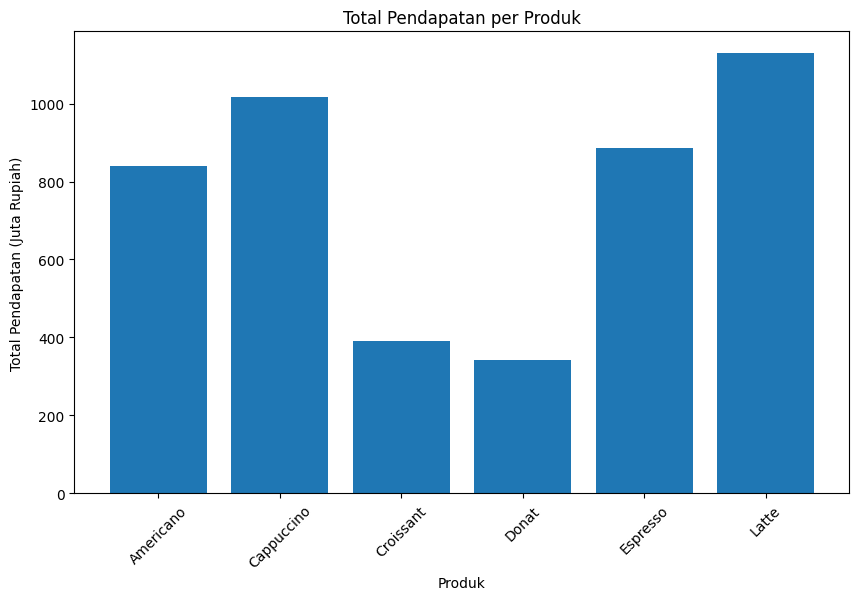

In [ ]:
#Visualisasi kan total pendapatan
plt.figure(figsize=(10, 6))
plt.bar(total_pendapatan.index, total_pendapatan.values)
plt.xlabel('Produk')
plt.ylabel('Total Pendapatan (Juta Rupiah)')
plt.title('Total Pendapatan per Produk')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Proporsi Total Pendapatan per Produk')

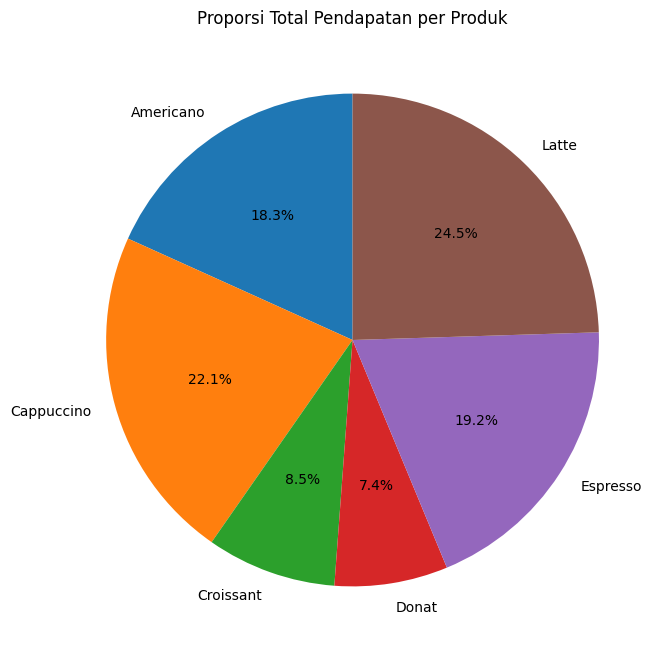

In [ ]:
#Gunakan pie chart untuk melihat proporsi
plt.figure(figsize=(8, 8))
plt.pie(total_pendapatan, labels=total_pendapatan.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Total Pendapatan per Produk')

###4.2 Hitung rata-rata unit terjual per hari tiap produk pada tiap tahun.

In [ ]:
#Rata rata unit terjual, per hari setiap produknya pada setiap tahun
rata_rata_unit_terjual = data.groupby(['Produk', 'Tahun'])['Unit_Terjual'].mean()
print("\nRata-rata Unit Terjual per Hari Setiap Produk pada Setiap Tahun:")
print(rata_rata_unit_terjual)


Rata-rata Unit Terjual per Hari Setiap Produk pada Setiap Tahun:
Produk      Tahun
Americano   2021     40.071217
            2022     38.208824
            2023     38.814590
Cappuccino  2021     39.394118
            2022     39.667656
            2023     40.051988
Croissant   2021     21.360360
            2022     21.547337
            2023     20.788060
Donat       2021     22.187320
            2022     22.313070
            2023     21.272464
Espresso    2021     40.291411
            2022     39.050595
            2023     39.195266
Latte       2021     39.560472
            2022     39.086826
            2023     39.462236
Name: Unit_Terjual, dtype: float64


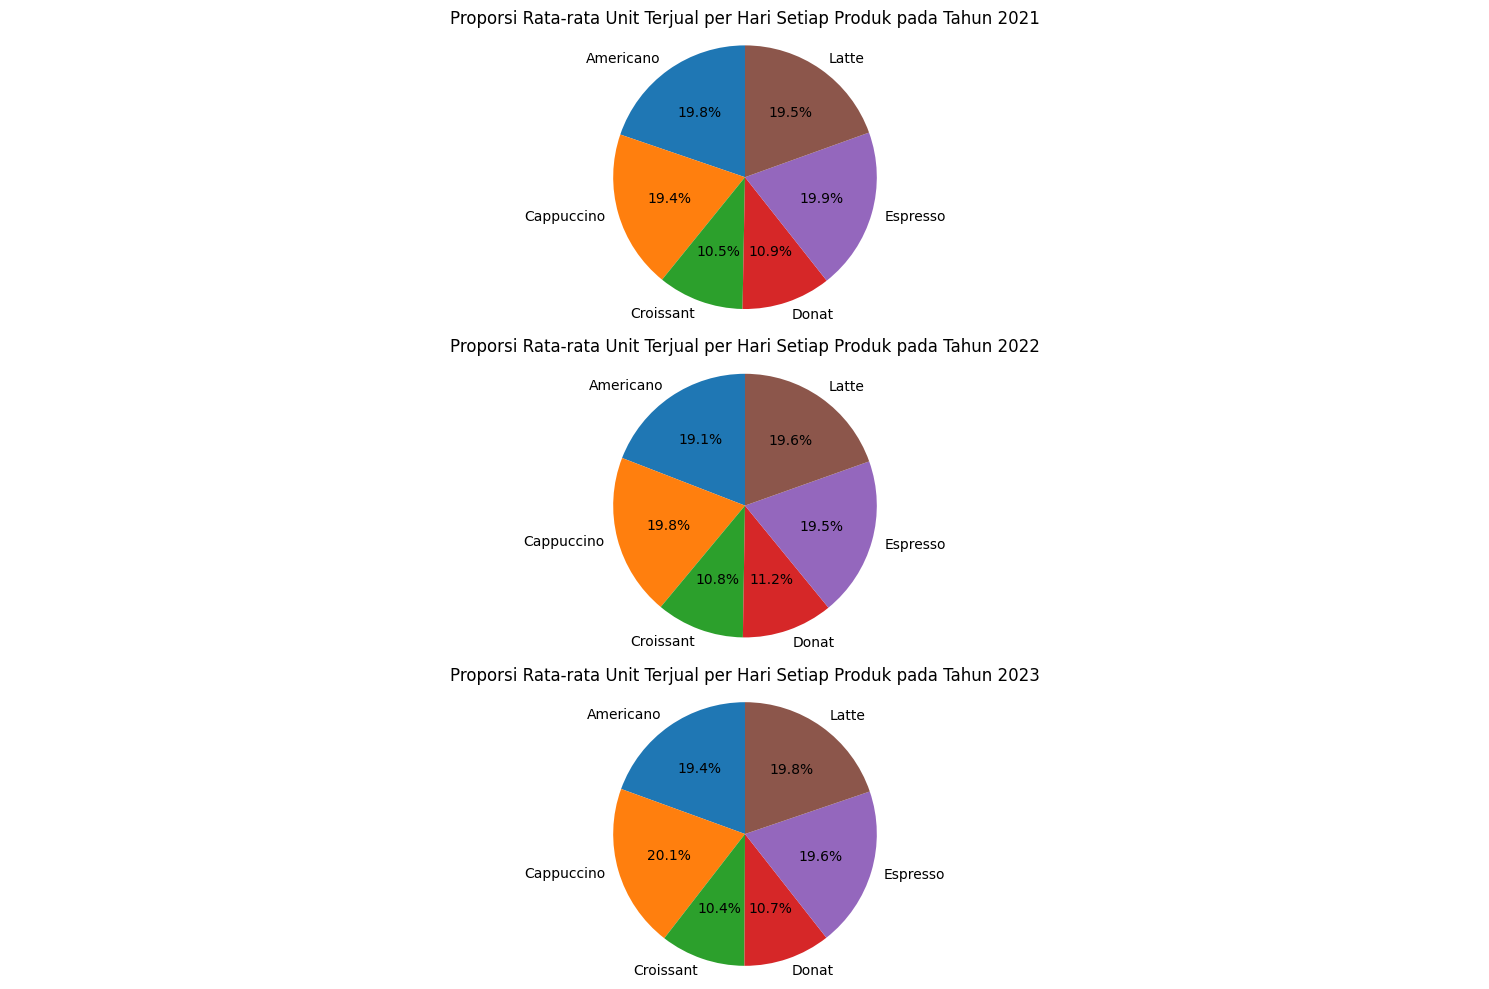

In [ ]:
#Buat proporsi nya dalam piechart
#Buat dalam 3 tahun, berati ada 3 pie chart
plt.figure(figsize=(15, 10))
for tahun in data['Tahun'].unique():
  data_tahun = data[data['Tahun'] == tahun]
  rata_rata_unit_terjual_tahun = data_tahun.groupby('Produk')['Unit_Terjual'].mean()
  plt.subplot(3, 1, tahun - 2021 + 1)
  plt.pie(rata_rata_unit_terjual_tahun, labels=rata_rata_unit_terjual_tahun.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Proporsi Rata-rata Unit Terjual per Hari Setiap Produk pada Tahun {tahun}')
  plt.axis('equal')
plt.tight_layout()
plt.show()

###4.3 Temukan produk terlaris per tahun.

In [ ]:
#Berdasarakan proporsi diatas ditemukan produk terlaris setiap tahun
produk_terjual_tertinggi = rata_rata_unit_terjual.groupby('Tahun').idxmax()
print("\nProduk Terjual Tertinggi Setiap Tahun:")
print(produk_terjual_tertinggi)


Produk Terjual Tertinggi Setiap Tahun:
Tahun
2021      (Espresso, 2021)
2022    (Cappuccino, 2022)
2023    (Cappuccino, 2023)
Name: Unit_Terjual, dtype: object


###4.4 Buat grafik batang total unit jual per produk (2021 - 2023).

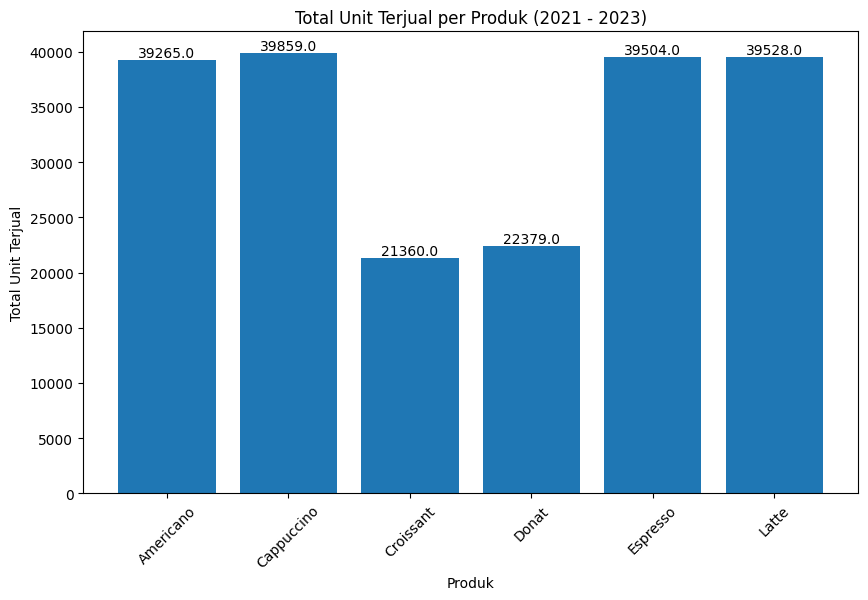

In [ ]:
#buat grafik batang total unit terjual perproduk
plt.figure(figsize=(10, 6))
ax = plt.bar(total_unit_terjual.index, total_unit_terjual.values)

# Corrected annotation logic
for p in ax: # Iterate through the patches in the BarContainer
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Produk')
plt.ylabel('Total Unit Terjual')
plt.title('Total Unit Terjual per Produk (2021 - 2023)')
plt.xticks(rotation=45)
plt.show() # Add plt.show() to display the plot



---


## TUGAS 5: Rangkuman & Insight

1. Tulis ringkasan hasil:
2. Sampaikan minimal 2 rekomendasi untuk bisnis.

### 5.1 Ringkasan Hasil

1. Produk penjualan tertinggi

- tahun 2021 adalah : Espresso
- tahun 2022 adalah : Cappucino
- tahun 2023 adalah : Cappucino



2. Total Proporsi Pendapatan Tertinggi  berdasarkan tiap produk:
- Latte : 24.5 %
- Cappuccino : 22,1 %
- Espresso : 19.2 %
- Americano : 18.3 %
- Croissant : 8.5 %
- Donat : 7.4 %


3. Total Pendapatan berdasarkan tiap produk :  
- Latte : 1.128 M
- Cappuccino : 1.016 M
- Espresso : 886 Jt
- Americano : 840 Jt
- Croissant : 392 Jt
- Donat : 342 Jt


Penjualan Produk Tertinggi setiap tahunnya
- Proporsi Rata rata Produk Terjual pada tahun 2021
  - Espresso : 19.9 %
  - Americano : 19.8 %
  - Latte : 19.5 %
  - Cappuccino : 19.4 %
  - Donat : 10.9 %
  - Croissant : 10.5 %

- Proporsi Rata rata Produk Terjual pada tahun 2022
  - Cappuccino : 19.8 %
  - Latte : 19.6 %
  - Espresso : 19.5 %
  - Americano : 19.1 %
  - Donat : 11.2 %
  - Croissant : 10.8 %

- Proporsi Rata rata Produk Terjual pada tahun 2023
  - Cappuccino : 20.1 %
  - Latte : 19.8 %
  - Espresso : 19.6 %
  - Americano : 19.5 %
  - Donat : 10.7 %
  - Croissant : 10.4 %


###5.2 Sampaikan minimal 2 rekomendasi untuk bisnis.

1. Cross-selling dan Bundling: Tawarkan paket promo di mana pembelian minuman tertentu mendapatkan diskon untuk produk makanan (misalnya, "Kopi + Donat Hemat"). Ini mendorong pelanggan minuman untuk mencoba makanan.



2. Fokus pada Produk Minuman Unggulan: Latte dan Cappuccino adalah penyumbang pendapatan terbesar. Bisnis harus terus memprioritaskan ketersediaan, kualitas, dan promosi untuk kedua produk ini. Pertimbangkan program loyalitas atau penawaran bundling khusus untuk produk-produk terlaris ini.

3. Inovasi Produk: Pertimbangkan varian baru atau edisi terbatas untuk produk makanan guna menarik perhatian dan meningkatkan minat beli.

4. Perbaiki Penempatan atau Tampilan: Pastikan produk makanan ditempatkan di lokasi yang strategis dan menarik secara visual untuk meningkatkan daya tarik.

## Tugas Opsional / Challenge (Pilihan):

1. **Identifikasi Bulan Tertinggi dan Terendah**
   
   - Temukan bulan dan tahun dengan total penjualan unit tertinggi dan terendah (dalam seluruh periode).
   - Visualisasikan trennya (misal line chart penjualan bulanan).



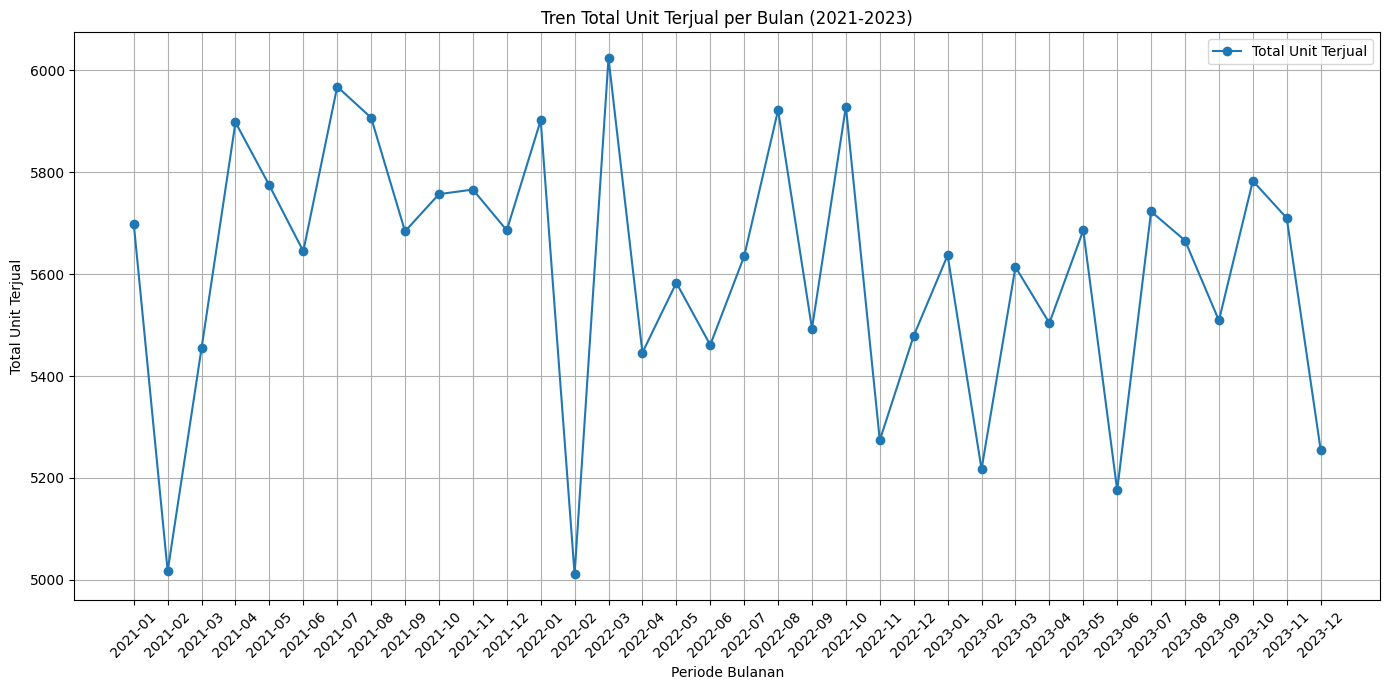

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Total Unit Terjual
plt.plot(monthly_summary['Tahun_Bulan_str'], monthly_summary['Total_Unit_Terjual'], marker='o', linestyle='-', label='Total Unit Terjual')
plt.xlabel('Periode Bulanan')
plt.ylabel('Total Unit Terjual')
plt.title('Tren Total Unit Terjual per Bulan (2021-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


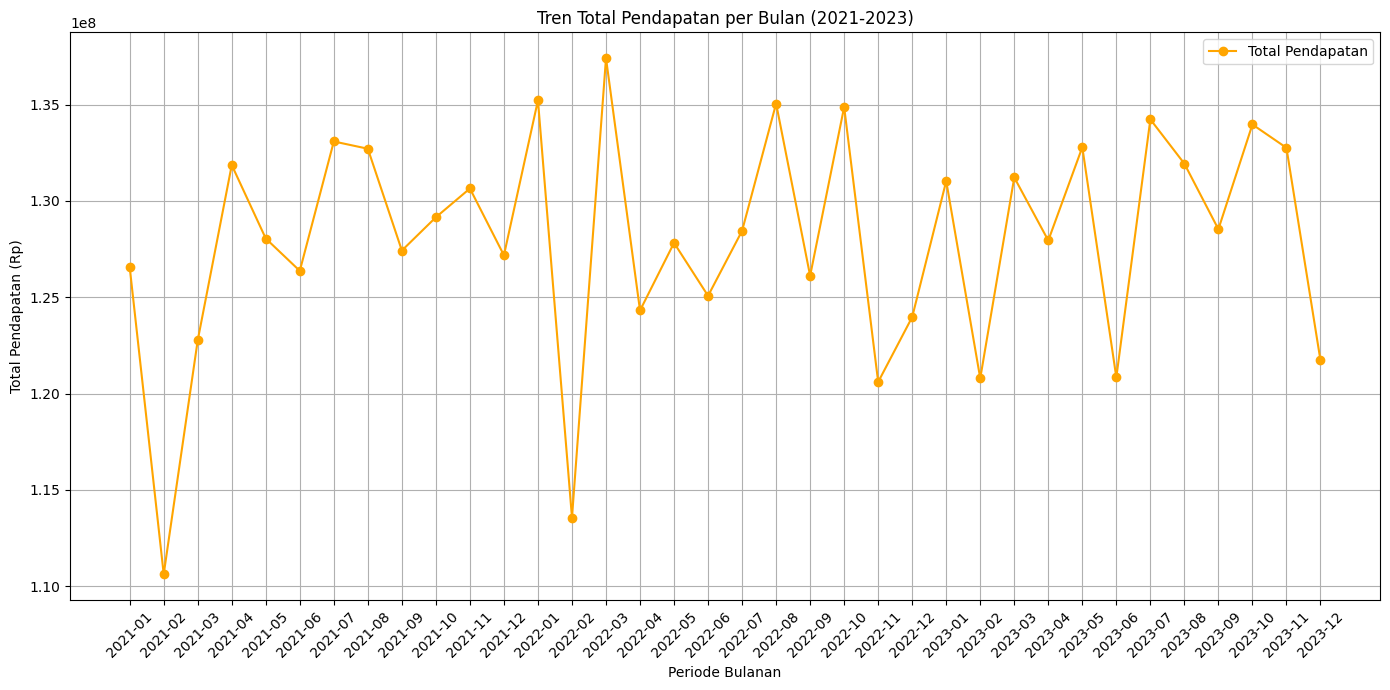

In [ ]:

# Plot Total Pendapatan separately for clarity due to different scale
plt.figure(figsize=(14, 7))
plt.plot(monthly_summary['Tahun_Bulan_str'], monthly_summary['Total_Pendapatan'], marker='o', linestyle='-', color='orange', label='Total Pendapatan')
plt.xlabel('Periode Bulanan')
plt.ylabel('Total Pendapatan (Rp)')
plt.title('Tren Total Pendapatan per Bulan (2021-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2. **Analisis Pertumbuhan Penjualan**
   
   - Bandingkan total penjualan (unit terjual maupun pendapatan) antar tahun 2021, 2022, dan 2023.
   - Produk apa yang pertumbuhannya paling tinggi selama 3 tahun?
   - Tampilkan hasilnya dalam bentuk tabel ringkasan pertumbuhan dan/atau visualisasi sederhana.


In [ ]:
yearly_summary = data.groupby('Tahun').agg(
    Total_Unit_Terjual=('Unit_Terjual', 'sum'),
    Total_Pendapatan=('Pendapatan', 'sum')
).reset_index()

display(yearly_summary)

,Tahun,Total_Unit_Terjual,Total_Pendapatan
0,2021,68256.0,1.526431e+09
1,2022,67159.0,1.532470e+09
2,2023,66480.0,1.547753e+09


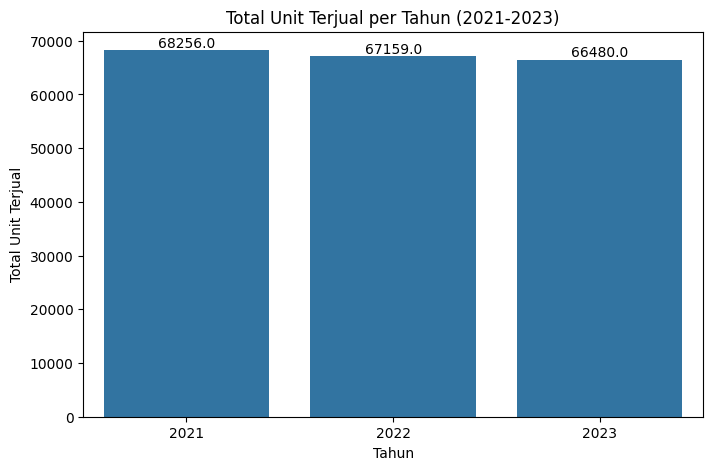

In [ ]:
# Plot Total Unit Terjual per Tahun
plt.figure(figsize=(8, 5))

ax = sns.barplot(x='Tahun', y='Total_Unit_Terjual', data=yearly_summary)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Tahun')
plt.ylabel('Total Unit Terjual')
plt.title('Total Unit Terjual per Tahun (2021-2023)')
plt.show()



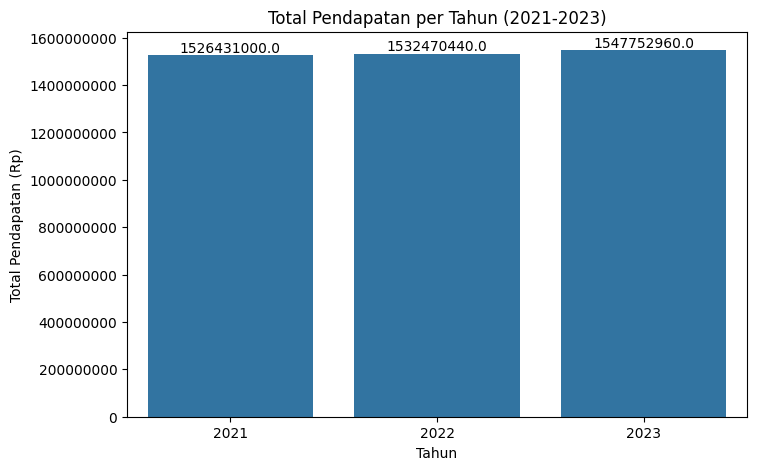

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Tahun', y='Total_Pendapatan', data=yearly_summary)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Tahun')
plt.ylabel('Total Pendapatan (Rp)')
plt.title('Total Pendapatan per Tahun (2021-2023)')
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.show()


3. **Simulasi Promo Diskon**
   
   - Simulasikan jika ada diskon 10% untuk produk minuman di bulan-bulan tertentu (misal: Juli & Agustus), dan asumsikan penjualan produk-produk ini naik 15% di bulan promo.
   - Hitung dan bandingkan pendapatan asli vs pendapatan setelah promo.
   - Jelaskan insight-nya, apakah strategi promo ini efektif? (Boleh angka “kasar”, tidak harus persis.)



Simulasikan diskon 10% untuk produk minuman (Espresso, Latte, Cappuccino, Americano) pada bulan Juli dan Agustus, dengan asumsi peningkatan penjualan sebesar 15% untuk produk-produk ini selama periode promosi. Bandingkan pendapatan aktual dengan pendapatan simulasi.

1. Pilih baris dalam DataFrame yang sesuai dengan Juli dan Agustus setiap tahun.
2. Buat DataFrame baru yang hanya berisi baris dari bulan Juli dan Agustus untuk semua tahun dan tampilkan judulnya.



In [ ]:
simulation_data = data[data['Bulan'].isin(['Juli', 'Agustus'])].copy()
display(simulation_data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan,Tahun_Bulan
1090,2021,Juli,1,Americano,38.0,21000.0,798000.0,2021-07-01,2021-07
1091,2021,Juli,1,Cappuccino,37.0,25000.0,925000.0,2021-07-01,2021-07
1092,2021,Juli,1,Croissant,21.0,18000.0,378000.0,2021-07-01,2021-07
1093,2021,Juli,1,Donat,21.0,15000.0,315000.0,2021-07-01,2021-07
1094,2021,Juli,1,Espresso,48.0,22000.0,1056000.0,2021-07-01,2021-07


1. Filter data simulasi agar hanya mencakup produk minuman.

In [ ]:
beverage_products = ['Espresso', 'Latte', 'Cappuccino', 'Americano']
simulation_data = simulation_data[simulation_data['Produk'].isin(beverage_products)]
display(simulation_data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan,Tahun_Bulan
1090,2021,Juli,1,Americano,38.0,21000.0,798000.0,2021-07-01,2021-07
1091,2021,Juli,1,Cappuccino,37.0,25000.0,925000.0,2021-07-01,2021-07
1094,2021,Juli,1,Espresso,48.0,22000.0,1056000.0,2021-07-01,2021-07
1095,2021,Juli,1,Latte,41.0,28000.0,1148000.0,2021-07-01,2021-07
1096,2021,Juli,2,Americano,39.0,21000.0,819000.0,2021-07-02,2021-07


1. Hitung total pendapatan aktual untuk bulan dan produk yang dipilih sebelum simulasi apa pun.

2. Hitung jumlah kolom 'Pendapatan' di DataFrame simulasi_data dan cetak hasilnya.

In [ ]:
total_actual_revenue = simulation_data['Pendapatan'].sum()
print(f"Total Actual Revenue for Selected Months and Products: Rp {total_actual_revenue:,.2f}")

Total Actual Revenue for Selected Months and Products: Rp 672,048,100.00


1. Hitung harga diskon per unit untuk produk yang dipilih (harga asli * 0,90).

2. Untuk menghitung harga diskon, buat kolom baru `Harga_Diskon` di kerangka data `simulation_data` dengan mengalikan `Harga_Per_Unit` dengan 0,9

In [ ]:
simulation_data['Harga_Diskon'] = simulation_data['Harga_Per_Unit'] * 0.90
display(simulation_data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan,Tahun_Bulan,Harga_Diskon
1090,2021,Juli,1,Americano,38.0,21000.0,798000.0,2021-07-01,2021-07,18900.0
1091,2021,Juli,1,Cappuccino,37.0,25000.0,925000.0,2021-07-01,2021-07,22500.0
1094,2021,Juli,1,Espresso,48.0,22000.0,1056000.0,2021-07-01,2021-07,19800.0
1095,2021,Juli,1,Latte,41.0,28000.0,1148000.0,2021-07-01,2021-07,25200.0
1096,2021,Juli,2,Americano,39.0,21000.0,819000.0,2021-07-02,2021-07,18900.0


Harga diskon telah dihitung dan ditambahkan sebagai kolom baru.



In [ ]:
simulation_data['Simulated_Unit_Terjual'] = simulation_data['Unit_Terjual'] * 1.15
simulation_data['Simulated_Unit_Terjual'] = simulation_data['Simulated_Unit_Terjual'].round().astype(int)
simulation_data['Simulated_Pendapatan'] = simulation_data['Simulated_Unit_Terjual'] * simulation_data['Harga_Diskon']
display(simulation_data.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan,Tahun_Bulan,Harga_Diskon,Simulated_Unit_Terjual,Simulated_Pendapatan
1090,2021,Juli,1,Americano,38.0,21000.0,798000.0,2021-07-01,2021-07,18900.0,44,831600.0
1091,2021,Juli,1,Cappuccino,37.0,25000.0,925000.0,2021-07-01,2021-07,22500.0,43,967500.0
1094,2021,Juli,1,Espresso,48.0,22000.0,1056000.0,2021-07-01,2021-07,19800.0,55,1089000.0
1095,2021,Juli,1,Latte,41.0,28000.0,1148000.0,2021-07-01,2021-07,25200.0,47,1184400.0
1096,2021,Juli,2,Americano,39.0,21000.0,819000.0,2021-07-02,2021-07,18900.0,45,850500.0


Penjualan dan pendapatan unit simulasi telah dihitung. Langkah selanjutnya adalah menghitung total pendapatan simulasi untuk periode promo dan membandingkannya dengan pendapatan aktual untuk mengevaluasi efektivitas promosi.




In [ ]:
total_simulated_revenue = simulation_data['Simulated_Pendapatan'].sum()
print(f"Total Simulated Revenue for Selected Months and Products: Rp {total_simulated_revenue:,.2f}")

revenue_difference = total_simulated_revenue - total_actual_revenue
print(f"Revenue Difference (Simulated - Actual): Rp {revenue_difference:,.2f}")

percentage_change = (revenue_difference / total_actual_revenue) * 100
print(f"Percentage Change in Revenue: {percentage_change:,.2f}%")

Total Simulated Revenue for Selected Months and Products: Rp 695,422,062.00
Revenue Difference (Simulated - Actual): Rp 23,373,962.00
Percentage Change in Revenue: 3.48%


Summary:

Temuan Utama Analisis Data
*   Total pendapatan aktual untuk produk minuman (Espresso, Latte, Cappuccino, Americano) pada bulan Juli dan Agustus di semua tahun adalah Rp 672.048.100,00.

*   Setelah simulasi diskon 10% dan peningkatan penjualan sebesar 15% untuk produk-produk ini selama bulan Juli dan Agustus, total pendapatan simulasi adalah Rp695.422.062,00.

*   Simulasi menunjukkan peningkatan pendapatan sebesar Rp23.373.962,00 dibandingkan dengan pendapatan aktual pada periode yang sama.

*   Peningkatan pendapatan ini menunjukkan perubahan persentase sebesar 3,48% dari pendapatan aktual.




Insights or Next Steps

*   Simulasi menunjukkan bahwa memberikan diskon 10% pada produk minuman tertentu selama bulan Juli dan Agustus, dengan asumsi peningkatan penjualan sebesar 15%, dapat menyebabkan dampak pendapatan yang positif.

*   Analisis lebih lanjut dapat mengeksplorasi dampak aktual terhadap volume penjualan dan perilaku pelanggan jika promosi tersebut diterapkan untuk memvalidasi asumsi peningkatan penjualan sebesar 15%.

4. **Deteksi Outlier**
   
   - Temukan hari-hari/tanggal tertentu dimana penjualan produk “melonjak tidak wajar” (misal, tiga kali lipat dari median hariannya). revisi menjadi 2
    
   - Saya mengubah ini menjadi 2 kali dari median, jika 3 kali median, tidak ditemukan outlier

   - Buat list tanggal tersebut dan sebutkan produk apa saja yang menjadi “outlier”.
   
   - Akan lebih baik jika langsung ditampilkan dalam bentuk boxplot



Temukan hari-hari/tanggal tertentu dimana penjualan produk “melonjak tidak wajar” dan sertakan boxploxnya setelah analisis

Kelompokkan data berdasarkan tanggal dan produk, lalu hitung total penjualan unit untuk setiap hari dan produk.



In [ ]:
daily_sales = data.groupby(['Tanggal_Penjualan', 'Produk'])['Unit_Terjual'].sum().reset_index()
display(daily_sales.head())

,Tanggal_Penjualan,Produk,Unit_Terjual
0,2021-01-01,Americano,52.0
1,2021-01-01,Cappuccino,45.0
2,2021-01-01,Croissant,20.0
3,2021-01-01,Donat,20.0
4,2021-01-01,Espresso,43.0


1. Untuk setiap produk, hitung median penjualan unit harian di semua tahun.

2. Hitung median penjualan unit harian untuk setiap produk guna menetapkan dasar deteksi outlier.

In [ ]:
median_daily_sales = daily_sales.groupby('Produk')['Unit_Terjual'].median()
display(median_daily_sales)

,Unit_Terjual
Produk,
Americano,39.0
Cappuccino,40.0
Croissant,21.0
Donat,22.0
Espresso,39.0
Latte,40.0


1. Untuk setiap produk, hitung ambang batas outlier dengan mengalikan median penjualan hariannya dengan 2.

2. Hitung ambang batas outlier untuk setiap produk dengan mengalikan median penjualan harian dengan 2.

In [ ]:
# Calculate the outlier threshold as 2 times its median daily sales
outlier_thresholds = median_daily_sales * 2
display(outlier_thresholds)

,Unit_Terjual
Produk,
Americano,78.0
Cappuccino,80.0
Croissant,42.0
Donat,44.0
Espresso,78.0
Latte,80.0


1. Filter data penjualan harian untuk menemukan tanggal dan produk dengan penjualan unit harian melebihi ambang batas outlier yang dihitung untuk produk tersebut.

In [ ]:
outliers_list = []
for produk, threshold in outlier_thresholds.items():
    product_outliers = daily_sales[(daily_sales['Produk'] == produk) & (daily_sales['Unit_Terjual'] > threshold)]
    for index, row in product_outliers.iterrows():
        outliers_list.append(row.to_dict())

outliers_df = pd.DataFrame(outliers_list)
display(outliers_df)

,Tanggal_Penjualan,Produk,Unit_Terjual
0,2021-03-21,Croissant,46.0
1,2022-02-22,Croissant,45.0
2,2022-10-26,Croissant,47.0
3,2023-05-21,Croissant,45.0
4,2023-10-07,Croissant,43.0
5,2021-02-04,Donat,52.0
6,2023-04-13,Donat,46.0


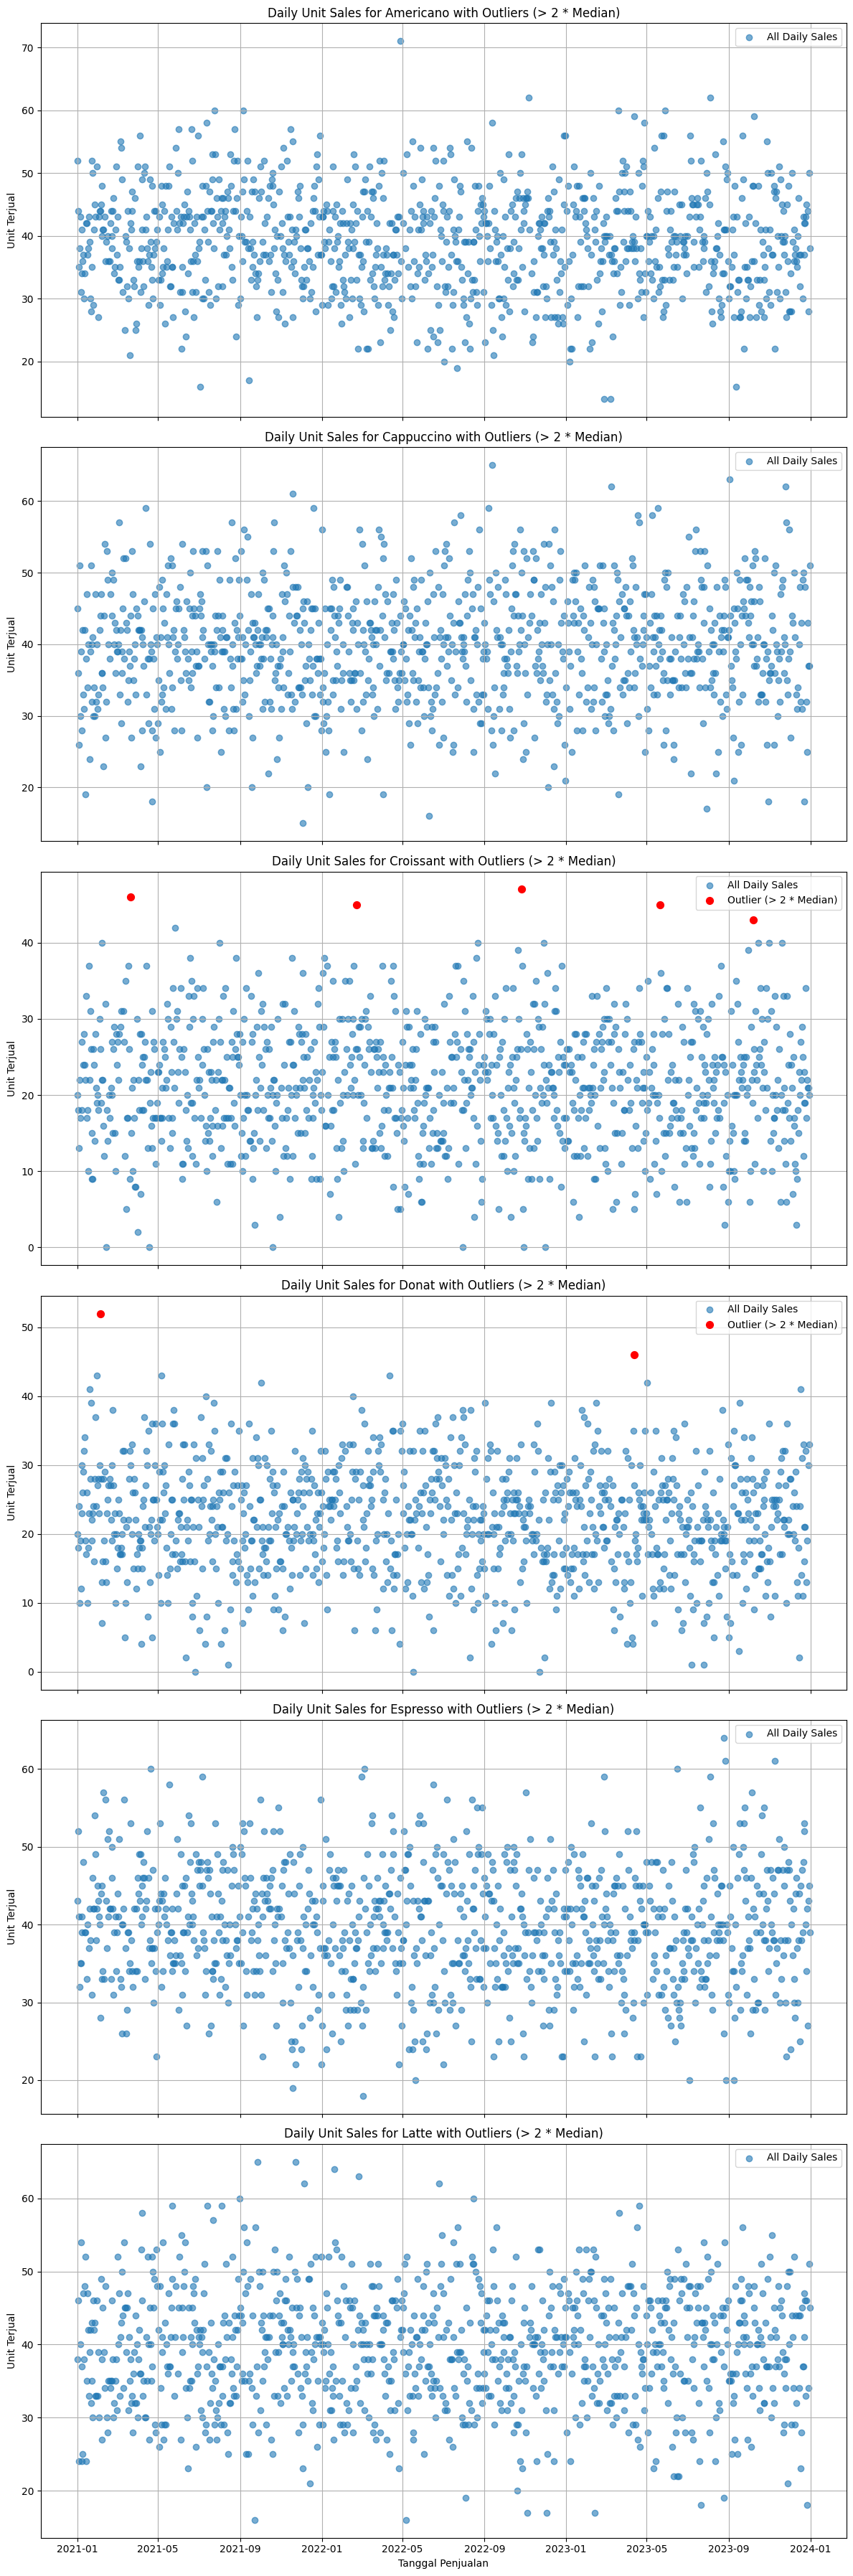

In [ ]:
# Ensure 'Tanggal_Penjualan' is datetime for plotting
daily_sales['Tanggal_Penjualan'] = pd.to_datetime(daily_sales['Tanggal_Penjualan'])

# Create a scatter plot for each product
products = daily_sales['Produk'].unique()
n_products = len(products)
fig, axes = plt.subplots(nrows=n_products, ncols=1, figsize=(12, 6 * n_products), sharex=True)

if n_products == 1:
    axes = [axes] # Ensure axes is iterable even for a single product

for i, produk in enumerate(products):
    product_data = daily_sales[daily_sales['Produk'] == produk]
    product_outliers = outliers_df[outliers_df['Produk'] == produk]

    # Plot all daily sales for the product
    axes[i].scatter(product_data['Tanggal_Penjualan'], product_data['Unit_Terjual'], label='All Daily Sales', alpha=0.6)

    # Highlight outliers for this product
    if not product_outliers.empty:
        axes[i].scatter(product_outliers['Tanggal_Penjualan'], product_outliers['Unit_Terjual'], color='red', label='Outlier (> 2 * Median)', s=50, zorder=5) # zorder to ensure dots are on top

    axes[i].set_title(f'Daily Unit Sales for {produk} with Outliers (> 2 * Median)')
    axes[i].set_ylabel('Unit Terjual')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Tanggal Penjualan')
plt.tight_layout()
plt.show()

5. **Cek Konsistensi Harga**
   
   - Adakah harga produk yang tidak sesuai aturan/rumus kenaikan 2% per tahun? (Cek kolom Harga_Per_Unit)
   - Jika ada data yang tidak konsisten, tampilkan semua kasusnya dan buat analisa ringkas.



In [ ]:
inconsistent_prices = []
tolerance = 0.01 # Use a small tolerance for floating point comparisons

for index, row in data.iterrows():
    product_name = row['Produk']
    year = row['Tahun']
    actual_price = row['Harga_Per_Unit']

    # Ensure product is in base_prices_2021 to calculate expected price
    if product_name in base_prices_2021:
        expected_price = calculate_yearly_price(base_prices_2021[product_name], year)

        # Check if the actual price is significantly different from the expected price
        # Use np.isclose for robust floating point comparison, or abs difference
        if not np.isclose(actual_price, expected_price, atol=tolerance):
        # Alternative check using absolute difference:
        # if abs(actual_price - expected_price) > tolerance:
            inconsistent_prices.append(row.to_dict())
    # else:
        # Handle cases where product is not in base_prices_2021 if necessary

inconsistent_prices_df = pd.DataFrame(inconsistent_prices)

if not inconsistent_prices_df.empty:
    print("Baris dengan Harga_Per_Unit yang Tidak Konsisten:")
    display(inconsistent_prices_df)
else:
    print("Semua Harga_Per_Unit konsisten dengan aturan kenaikan 2% per tahun.")

Semua Harga_Per_Unit konsisten dengan aturan kenaikan 2% per tahun.
